In [2]:
import time
import copy
import math

import cv2
import imutils
from matplotlib import pyplot as plt
import os


import iros_vision_tools as ivt
import iros_vision_functions as ivfunc

In [3]:
#ivt.check_camera()

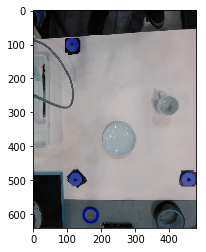

In [32]:
cali_img = ivt.capture_pic(1, 3)
plt.imshow(cali_img)
plt.show()

{'radius': [4, 9], 'thresh': [65, 100]}
COUNTERR:  44
Separation from original circles:  [[ 397.12591553]]
[ 123.5         497.5           4.74341631]
[[ True]]
IT IS A COMPLETELY SEPARATE CIRCLE
COUNTERR:  50
Separation from original circles:  [[ 523.99713135  332.        ]]
[ 455.5         497.5           4.94974756]
[[ True  True]]
IT IS A COMPLETELY SEPARATE CIRCLE
[ 113.5         100.5           4.94974756]
[ 123.5         497.5           4.74341631]
[ 455.5         497.5           4.94974756]
15
All Calibration points found


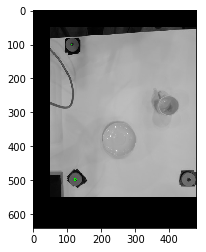

Change Calibration?: no
(1, 3, 3)
CALI_CIRCLES [[0.0, 0.0], [10.0, 397.0], [342.0, 397.0]]


In [33]:
cali_img = ivt.black_out(cali_img, [50,550,50,-1])

circles_sorted, crop_points = ivt.run_calibration(cali_img, adjust=True)
cali_circles_init = circles_sorted-circles_sorted[0][0]
cali_circles=[]
for circ in cali_circles_init[0]:
    cali_circles.append([circ[0], circ[1]])

print "CALI_CIRCLES", cali_circles

p1, inverse = ivt.pix3world_cal(cali_circles[0],cali_circles[2], cali_circles[1])

{'radius': [30, 85], 'thresh': [25, 60]}
23
All Calibration points found
{'radius': [30, 85], 'thresh': [105, 140]}
[ 137.5         275.5          44.74930191]
[ 204.5          64.5          83.44159698]
[ 157.5         270.5          76.14788055]
24
All Calibration points found
9
3
[ 137.5         275.5          44.74930191]
[ 204.5          64.5          83.44159698]
[ 157.5         270.5          76.14788055]


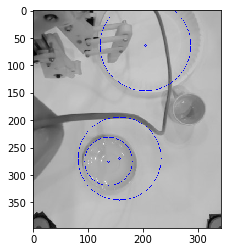

CROP_POINTS:  [100.5, 497.5, 113.5, 455.5]
P1:  [0.0, 0.0]
INVERSE [[  3.01204819e-03  -7.58702316e-05]
 [ -0.00000000e+00  -2.51889169e-03]]


KeyError: 'saucer'

In [34]:
CAMERA = 1

PATH_TO_TASK_IMAGES = "task_images"
task_img_1 = ivt.capture_pic(CAMERA,3)
cv2.imwrite(os.path.join(PATH_TO_TASK_IMAGES, 'task_img_1.jpg'), task_img_1)
crop_task_img_1 = ivt.crop_out(task_img_1, crop_points)
table_circles = ivfunc.cup_saucer(crop_task_img_1, show=True)
print "CROP_POINTS: ", crop_points
print "P1: ", p1
print "INVERSE", inverse

m_circle = table_circles["mug"]["circle"]
s_circle = table_circles["saucer"]["circle"]
print "m_circle: ", m_circle
print "s_circle: ", s_circle
mp = [m_circle[0], m_circle[1]]
mx,my = ivt.pix3world(p1, inverse, mp)
mx = mx[0,0]
my = my[0,0]

sp = [s_circle[0], s_circle[1]]
sx,sy = ivt.pix3world(p1, inverse, sp)
sx = sx[0,0]
sy = sy[0,0]

#vision stuff: get mug and saucer position
# mug and saucer centre positions
#mx,my,sx,sy = mug_saucer_pos

print "MX: ", mx
print "MY: ", my


In [35]:
task_img_1 = ivt.capture_pic(CAMERA,3)
cv2.imwrite(os.path.join(PATH_TO_TASK_IMAGES, 'task_img_1.jpg'), task_img_1)
crop_task_img_1 = ivt.crop_out(task_img_1, crop_points)

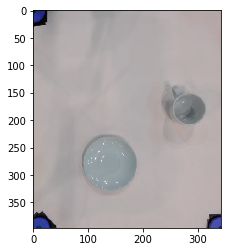

In [36]:
plt.imshow(crop_task_img_1)
plt.show()

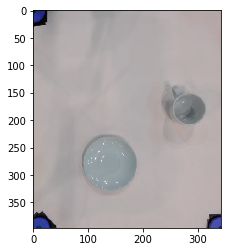

{'radius': [25, 55], 'thresh': [105, 140]}
COUNTERR:  71
Separation from original circles:  [[ 174.18380737]]
[ 140.5        278.5         48.7083168]
[[ True]]
IT IS A COMPLETELY SEPARATE CIRCLE
[ 284.5         180.5          27.61340332]
[ 140.5        278.5         48.7083168]
34
All Calibration points found
Quit
2


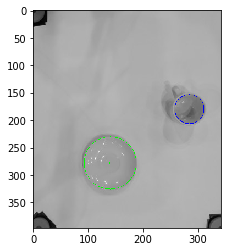

In [38]:
import numpy as np
def cup_saucer2(test_image, show=False):
    test_img = copy.copy(test_image)

    CAL_PARAM = {'thresh': [105, 140],
                'radius': [25,55]}
    circles2, cimg = ivt.find_circles2(copy.copy(test_img), 2, param=CAL_PARAM, blur=1, overlap=False, 
                                       separation=80, show=True)
    
    print len(circles2[0])
    
    

    table_circles = {}
    store = []
    for j,i in enumerate(circles2[0]):
        circle_info = {}
        circle_info["id"] = j
        coords = np.array([i[:-1]])
        
        radius = i[-1]
        circle_info["radius"] = radius
        circle_info["circle"]=i
        num = 0
        store.append(circle_info)
    
    if store[0]["radius"]>store[0]["radius"]:
        table_circles["saucer"]=store[0]
        table_circles["cup"]=store[1]
    else:
        table_circles["cup"]=store[0]
        table_circles["saucer"]=store[1]
    
    cv2.circle(cimg,(int(table_circles["saucer"]["circle"][0]),
                     int(table_circles["saucer"]["circle"][1])),
               int(table_circles["saucer"]["circle"][2]),
               (0,255,0),1)
                # draw the center of the ci~rcle
    cv2.circle(cimg,(int(table_circles["cup"]["circle"][0]),
                     int(table_circles["cup"]["circle"][1])),
               int(table_circles["cup"]["circle"][2]),
               (0,0,255),1)
    if show==True:
        plt.imshow(cimg)
        plt.show()

    return table_circles


crop_task_img_1 = ivt.crop_out(task_img_1, crop_points)
table_circles = cup_saucer2(crop_task_img_1, show=True)

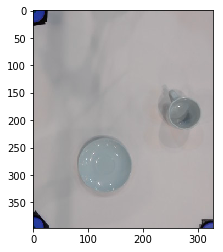

{'radius': [22, 50], 'thresh': [125, 160]}
[ 277.5         188.5          26.65520668]
[ 132.5         282.5          46.93080139]
25
All Calibration points found
Quit


In [18]:
test_img = copy.copy(crop_task_img_1)
CAL_PARAM = {'thresh': [125, 160],
            'radius': [22,50]}
circles2, cimg = ivt.find_circles2(copy.copy(test_img), 2, param=CAL_PARAM, blur=1, overlap=True, 
                                       separation=180, show=True)